In [3]:
import os

In [4]:
list_videos = os.listdir()
list_videos = [video_id for video_id in list_videos if ".csv" in video_id]
len(list_videos)

441

In [6]:
import emorec_text.config as config
import pandas as pd

count_emotions = {}

for emotion in config.emotions:
    count_emotions[emotion] = 0

for video_id in list_videos:
    df = pd.read_csv(video_id)
    df.fillna("NA", inplace=True)
    list_emotions = list(df["dominant_emotion"])

    for emotion in list_emotions:
        count_emotions[emotion] += 1

count_emotions

{'angry': 2369,
 'disgust': 55,
 'fear': 7375,
 'happy': 3903,
 'sad': 1651,
 'surprise': 1285,
 'neutral': 5475,
 'NA': 18653}

In [11]:
import matplotlib.pyplot as plt
import numpy as np

list_values = np.array(list(count_emotions.values()))
list_keys = list(count_emotions.keys())

In [12]:
sorted_idx = np.argsort(-list_values)
list_values = list_values[sorted_idx][1:]
list_keys = [list_keys[idx] for idx in sorted_idx][1:]

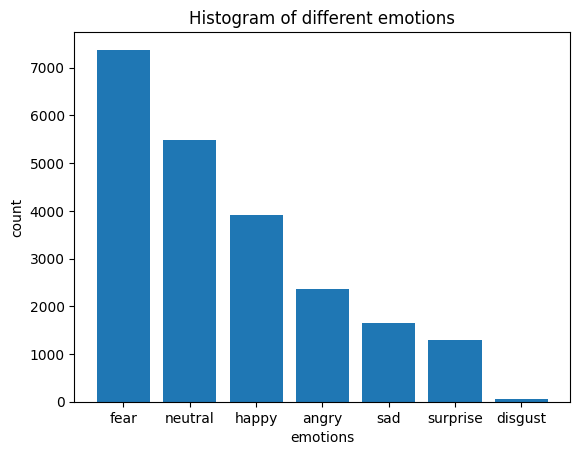

In [18]:
plt.bar(np.arange(len(list_values)), list_values)
plt.xticks(np.arange(len(list_values)), list_keys)
plt.title("Histogram of different emotions")
plt.xlabel("emotions")
plt.ylabel("count")
plt.savefig("emotion_hist.jpg", dpi=400)
plt.show()